# PCA (Principle Component Analysis)

Principal Component Analysis (PCA) is a statistical technique used in data analysis and machine learning to simplify the complexity of high-dimensional data while retaining most of the variation in the data set. This is achieved by transforming the data to a new set of variables, the principal components, which are orthogonal (uncorrelated) and ordered such that the first few retain most of the variation present in all of the original variables.

## Steps in PCA

#### Standardization:

    Scale the data so that each feature has a mean of zero and a standard deviation of one.

#### Covariance Matrix Computation:

    Compute the covariance matrix to understand how the features of the data are related to each other.

#### Eigenvalues and Eigenvectors:

    Calculate the eigenvalues and eigenvectors of the covariance matrix. These will provide the directions (principal components) and magnitudes (eigenvalues) of the variance in the data.

#### Feature Vector:

    Form a feature vector by selecting the eigenvectors (principal components) that correspond to the largest eigenvalues.

#### Recast the Data:

    Transform the original data set by multiplying it by the feature vector, which will reduce its dimensionality.

### Why Use PCA?

#### Dimensionality Reduction:
Reduces the number of variables in the data set while retaining the most important information.

#### Noise Reduction: 
Can help in removing noise and redundancy from the data.

#### Visualization: 
Helps in visualizing high-dimensional data by projecting it into 2D or 3D space.

#### Improved Performance:
Often improves the performance of machine learning algorithms by reducing the complexity of the data.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction that can be used to preprocess data before training a machine learning model.

In [1]:
pip install pandas numpy scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(df.isnull().sum())




fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Separate features and target variable
X = df.drop('quality', axis=1)  # 'quality' is the target variable
y = df['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.decomposition import PCA

# Define the number of principal components
n_components = 2  # You can choose the number of components you want

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


Explained variance ratio: [0.28173931 0.1750827 ]


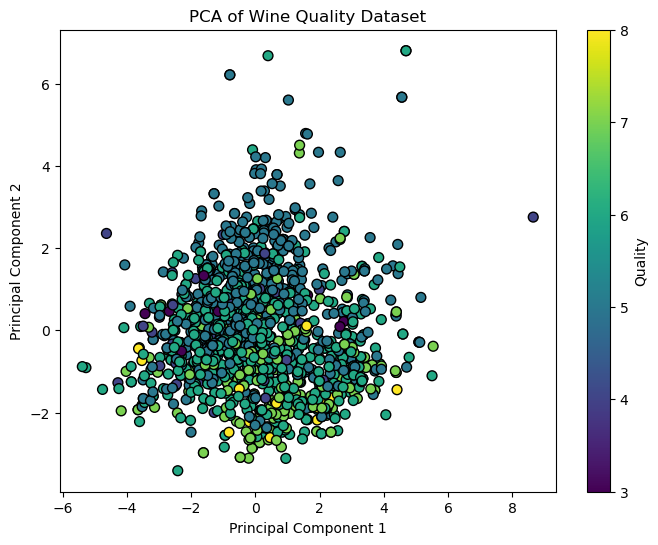

In [5]:
import matplotlib.pyplot as plt

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Quality Dataset')
plt.colorbar(scatter, label='Quality')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 54.69%


The 54% accuracy suggests that there might be potential issues with how the model was set up, or it might simply be a characteristic of the data and the chosen approach.

#### Here are some strategies you can try to improve the performance:

### Increase the Number of Principal Components:

Using only 2 principal components may result in significant loss of information. Try increasing the number of components.

### Hyperparameter Tuning:

Optimize the hyperparameters of the Random Forest classifier.

### Use All Features Without PCA:

Sometimes PCA might not improve performance if the original features are more informative.


### Different Models: 

Try using different machine learning models.

# Step 1: Apply PCA with More Components

In [8]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Increase the number of principal components
n_components = 10  # Adjust this number to retain more information
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 67.19%


# Step 2: Hyperparameter Tuning

Use GridSearchCV to optimize the hyperparameters of the Random Forest classifier.

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and train the model
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after hyperparameter tuning: {accuracy * 100:.2f}%')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy after hyperparameter tuning: 68.12%


# Step 3: Try Different Machine Learning Models

Try using other classifiers like Gradient Boosting, XGBoost, or Support Vector Machines.

In [12]:
from sklearn.svm import SVC

# Train an SVM Classifier
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy with SVM: {accuracy_svm * 100:.2f}%')

Accuracy with SVM: 60.00%


In [13]:
# Hyperparameter tuning with GridSearchCV for SVM

}param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid=param_grid_svm, refit=True, verbose=2, n_jobs=-1, cv=3)
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
print(f'Best parameters for SVM: {best_params_svm}')
best_clf_svm = grid_search_svm.best_estimator_
best_clf_svm.fit(X_train, y_train)
y_pred_svm = best_clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy after hyperparameter tuning (SVM): {accuracy_svm * 100:.2f}%')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END ma

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimato

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimato

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_esti